# Analyzing Employee Exit Surveys to Improve Retention Strategies

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. By analyzing the data collected from these surveys, organizations can gain insights into the underlying causes of employee dissatisfaction and tailor their retention strategies more effectively.

As a result of this project, we aim to answer the following questions: 
- Are employees who only worked for the institutes for a short period of time resigning due dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to dissatisfaction? What about older employees?
- Do female employees resign due to dissatisfaction more than male employees?
- What institution has more ex-employees who resigned due to dissatisfaction?

## Summary of results 
- Employees with more than 7 years of work experience are more likely to quit due to some kind of dissatisfaction than the ones who worked for a short period of time.
- 35% of young employees are resigning due to dissatisfaction. However, the number increases till 42% for older employees.
- There is no relationship between resignation due to some kind of dissatisfaction and gender.
- DETE has a twice higher proportion of employees resigning due to dissatisfaction, compared to TAFE.

## Data dictionary 
Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:
- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:
- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

## 1: Data cleaning
### Primary data exploration

We'll start by reading the datasets into pandas.

In [1]:
# importing pandas and numpy using their common aliases
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv') 

Now we're going to print information about information about both dataframes, as well as the first few rows.

In [2]:
pd.options.display.max_columns = 150 # to avoid truncated output

# for DETE survey
print(dete_survey.info()) # information about data
dete_survey.head() # first few entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Observations for the `DETE` survey:
- 822 entries, 56 columns
- Every other column except `Id` is object or boolean datatype
- Although it states there are no null values in the `DETE Start Date`, it contains a `Not Stated` value

In [3]:
# counting the number of null values in 'DETE Start Date'
dete_survey['DETE Start Date'].isnull().value_counts()

False    822
Name: DETE Start Date, dtype: int64

Now we've confirmed that `Not Stated` is not represented as `NaN`. We will keep that as a note for now and will move on to the `tafe_survey`.

In [4]:
# for TAFE survey
print(tafe_survey.info()) # information about data
tafe_survey.head() # first few entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Observations for the `TAFE` survey:
- 702 rows, 72 columns
- Every other column except `Id` is object datatype

Observations for both dataframes: 
- Both dataframes contain many columns that we don't need to complete our analysis (e.g. `WorkUnitViews..`)
- Each dataframe contains many of the same columns, but the column names are different (e.g. `Ill Health` and `Contributing Factors. Ill Health`)
- There are multiple columns that indicate an employee resigned because they were dissatisfied (e.g. `Contributing Factors..`)

### Fixing Missing Values 

As we noticed before, `Not Stated` should be represented as `NaN` in the `dete_survey` dataframe. 

In [5]:
# reading the file again, specifying the missing values
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

# proving that the method has worked and null values are identified
dete_survey['DETE Start Date'].isnull().value_counts()

False    749
True      73
Name: DETE Start Date, dtype: int64

Successful! Now Python can see 73 null values in the dataframe. Moving on.

### Dropping Unnecessary Values

To make the dataframes easier to work with, we will drop columns that are not related to the primary goals of our analysis. 

As mentioned before, we want to focus on columns that contain resignation reasons and contributing factors, ages and job duration.

In [6]:
# dropping unnecessary columns in DETE survey
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
# dropping unnecessary columns in DETE survey
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Cleaning Common Column Names

Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis, in `dete_survey` and `tafe_survey`, respectively:

- `ID` and `Record ID`
- `SeparationType` and `Reason for ceasing employment`
- `Cease Date` and `CESSATION YEAR`
- `Age` and `CurrentAge. Current Age`
- `Gender` and `Gender. What is your gender?`
- `DETE Start Date` 
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)` (only for TAFE)

Because we eventually want to combine them, we'll have to standardize the column names. 

In [8]:
# removing capitalization, removing whitespace from the end, replacing spaces with underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()

# checking if the column names have updated
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
# standardizing TAFE column anmes according to DETE column names
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id', 
                           'CESSATION YEAR': 'cease_date', 
                           'Reason for ceasing employment': 'separationtype',
                           'Gender. What is your Gender?': 'gender',
                           'CurrentAge. Current Age': 'age',
                           'Employment Type. Employment Type': 'employment_status',
                           'Classification. Classification': 'position', 
                           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service', })

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Below, we can see that now columns that contain the same type of information in both dataframes have the same names.

In [10]:
display(tafe_survey_updated.head(1))
dete_survey_updated.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes


### Filtering the Resignation Respondents

If we look at the tables above, there are different `separationtype` values. For this project, we only need to consider survey respondents who *resigned*.

In [11]:
# checking 'separationtype' value variations and frequency for DETE
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Interesting observation for the `dete_survey` - there are different `Resignation` types, all of which should be taken into account.

In [12]:
# checking 'separationtype' value variations and frequency for TAFE
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Compared to DETE, TAFE contains only one `Resignation` category.

In [13]:
# selecting DETE correspondents who resigned
dete_resignation_filter = dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignations = dete_survey_updated[dete_resignation_filter].copy() # to avoid SettingWithCopy Warning

dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


As we can see, we've isolated resignation-related DETE respondents successfully. Let's repeat with the TAFE survey.

In [14]:
# selecting TAFE correspondents who resigned
tafe_resignation_filter = tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)
tafe_resignations = tafe_survey_updated[tafe_resignation_filter].copy() # to avoid SettingWithCopy Warning

tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


Likewise, we've also isolated resignation-related DETE respondents.

### Veryfying the Employment Dates

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns fall within the 1940-2024 period.

Reason to choose 2024 as the maximum value: 
- Since the `dete_start_date` is the first employment year and the `cease_date` is the last employment year, it doesn't make sense to have years after the current date.

Reason to choose 1940 as the minimum value: 
- Given that most people in this field start working in their 20s, it's also unlikely that the start date was before the year 1940

In [15]:
# viewing the unique DETE cease years
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

To make the formatting in the `cease_date` consistent, we will clean the column a little.

In [16]:
# extracting cease dates for DETE
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'(\d{4})').astype(float)

# checking for the cease date consistency for DETE
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [17]:
# checking for the start date consistency for TAFE
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [18]:
# checking for the cease date consistency for TAFE
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

All dates fall within the desired range from 1940 to 2024.

Let's visualize and compare the distribution of `cease_date` with a boxplots for both DETE and TAFE.

Text(0.5, 0, 'tafe_cease_date')

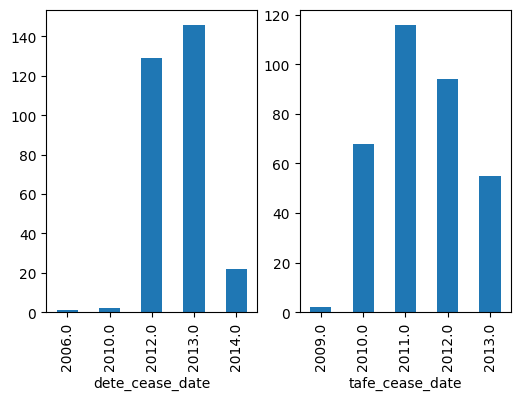

In [19]:
# importing matplotlib for building graphs
import matplotlib.pyplot as plt
%matplotlib inline

# specifying the bar char content
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(6,4))
dete_resignations['cease_date'].value_counts().sort_index().plot(kind='bar', ax=ax1)
tafe_resignations['cease_date'].value_counts().sort_index().plot(kind='bar', ax=ax2)
ax1.set_xlabel('dete_cease_date')
ax2.set_xlabel('tafe_cease_date')

`2012` seems to be one of the most frequent resignation months in both DETE and TAFE. Apart from that, the main resignation years don't show exact match. However, we're only focused on the reasons of resignation, not the dates, so we'll keep column as they are. 

In [20]:
# check if cease_date is greater than start_date
(dete_resignations['cease_date'] - dete_resignations['dete_start_date']).unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

We can also confirm that all cease dates are followed by start dates, not vice versa.

### Adding the DETE institute service column

As TAFE survey already has the `institute_service` column, we will add the same one to the DETE dataframe. We do it to ensure that both surveys can be analyzed together.

In [21]:
# adding the new column
dete_resignations['institute_service'] = (dete_resignations['cease_date'] - dete_resignations['dete_start_date'])

# confirming that the column appeared
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

### Identifying Dissatisfed Employees
Now, we'll identify the employees who resigned due to dissatisfaction.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

1. tafe_survey_updated:
`Contributing Factors. Dissatisfaction`
`Contributing Factors. Job Dissatisfaction`

2. dete_survey_updated:
`job_dissatisfaction`
`dissatisfaction_with_the_department`
`physical_work_environment`
`lack_of_recognition`
`lack_of_job_security`
`work_location`
`employment_conditions`
`work_life_balance`
`workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.

In [22]:
# viewing dissatisfaction values in TAFE
print('Unique values in "Contributing Factors. Dissatisfaction":')
print(tafe_resignations['Contributing Factors. Dissatisfaction'].unique())
print('\n')
print('Unique values in "Contributing Factors. Job Dissatisfaction":')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique())

Unique values in "Contributing Factors. Dissatisfaction":
['-' 'Contributing Factors. Dissatisfaction ' nan]


Unique values in "Contributing Factors. Job Dissatisfaction":
['-' 'Job Dissatisfaction' nan]


As we notice, responses for both columns follow the same logic, so we assume that:

    - `-` means `No`
    - `(Name of the Column)` means `Yes`
    - `nan` means `NaN`
    
To identify the desired respondents, we will turn the reponses to `True`, `False` and `NaN`.

In [23]:
# writing a function that will update the responses into a new format
def update_vals(value):
    if value == '-':
        return False
    elif pd.isnull(value):
        return np.nan
    else:
        return True
    
columns = ['Contributing Factors. Dissatisfaction', 
        'Contributing Factors. Job Dissatisfaction']
# to avoid the SettingWithCopy Warning 
tafe_resignations_up = tafe_resignations.copy()
# applying the function to TAFE survey
tafe_resignations_up[columns] = tafe_resignations_up[columns].applymap(update_vals)
# ensuring the function worked
tafe_resignations_up['Contributing Factors. Dissatisfaction'].value_counts()

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

We can see that dissatisfied ex-`TAFE` employees were successfully identified. We don't need to repeat the same procedure for `DETE` as the data is already recorded in the desired format.

As the next step, we'll create a separate column `Dissatisfied` that will combine the result of both columns.

In [24]:
# returns the result if dissatisfaction was True at least once
tafe_resignations_up['dissatisfied'] = tafe_resignations_up[columns].any(axis=1, skipna=False)
# confirming the result
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

We can confirm that there are 91 dissatisfied ex-`TAFE` employees identified. Let's repeat the same procedure with `DETE`.

In [25]:
# isolating desired columns in a list
columns = ['job_dissatisfaction', 
           'dissatisfaction_with_the_department',
           'physical_work_environment',
           'lack_of_recognition',
           'lack_of_job_security', 
           'work_location',
           'employment_conditions',
           'work_life_balance',
           'workload']

# to avoid the SettingWithCopy Warning
dete_resignations_up = dete_resignations.copy()
# returns the result if dissatisfaction was True at least once
dete_resignations_up['dissatisfied'] = dete_resignations_up[columns].any(axis=1, skipna=False)
# confirming the result
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

We've identified 149 ex-`DETE` employees who mentioned dissatisfaction in their surveys.

### Combining the Data
At this step, we'll aggregate the data according to the `institute_service` column.

First, we'll add a column to each dataframe that will allows us to easily distinguish between the two.

In [26]:
# to confirm that data was successfully combined
print(dete_resignations_up.shape)
print(tafe_resignations_up.shape)

(311, 37)
(340, 24)


In [27]:
# 'identifier' for DETE
dete_resignations_up['institute'] = 'DETE'
# 'identifier' for TAFE
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)
# the number of rows and columns should be the sum of rows and columns from non-combined dataframes
combined.shape

(651, 53)

The data was successfully combined. 

### Dropping Unnecessary Columns
To ensure that our analysis is valid, we'll also drop columns with less than 500 non-null values.

In [28]:
# dropping columns with less than 500 non-null values
combined_updated = combined.dropna(axis='columns', thresh = 500).copy()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


### Cleaning the Dissatisfied Column
As our analysis is focused on the employee dissatisfaction, we need to make sure that the column is clean and ready for the analysis.

In [29]:
# confirming the True/False format and finding the number of missing values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We've identified 8 missing values from the `dissatisfied` column. As this column is crucial for our analysis, we won't drop null values. Instead, we will replace them with the value that occurs most frequently in this column. 

In [30]:
# finding the most frequently occurring value
most_occuring_val_dissatisfied = combined_updated['dissatisfied'].mode()[0]
# filling empty spaces with the most frequently ocurring value
combined_updated['dissatisfied'].fillna(most_occuring_val_dissatisfied, inplace=True)
# confirming the replacement was successful
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

### Cleaning the Service Column
We also need to ensure that the service column is clean and ready for the analysis. First, we'll make sure that the data in the `institute_service` column is standardized. 

In [31]:
# checking unique values in the 'institute_service' column and their frequencies
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


As we can see, the data is presented in many different forms. To solve this issue, we'll convert these numbers into categories. Based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), understanding employee's needs according to career stage instead of age is also more effective. 

Our definitions would be: 
- `New`: Less than 3 years at a company
- `Experienced`: 3-6 years at a company
- `Established`: 7-10 years at a company
- `Veteran`: 11 or more years at a company

In [32]:
# converting all values in the 'institute_service' column to strings
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

# extracting digits and converting them to floats
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)').astype(float)

# checking updated institute service values
combined_updated['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

The conversion was successful. Next, we'll map each value to one of the career stage definitions above.

In [33]:
# creating a function that maps years of experience to career stage
def years_to_stages(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    else:
        return 'Veteran'

# applying the function and creating a new column
combined_updated['service_cat'] = combined_updated['institute_service'].apply(years_to_stages)
# checking if the new column was created and the values are correct
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced


As a final step, we will replace the missing values in the `institute_service` column to the most frequently ocurring ones.

In [34]:
# checking the number of missing values
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

We need to replace 88 missing values.

In [35]:
# finding the most frequently occurring value
most_occuring_val_service = combined_updated['service_cat'].mode()[0]
# filling empty spaces with the most frequently ocurring value
combined_updated['service_cat'].fillna(most_occuring_val_service, inplace=True)
# confirming the replacement was successful
combined_updated['service_cat'].value_counts(dropna=False)

New            281
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Cleaning the Age column
We will repeat the procedures with the `age` column as well, to make sure the data is ready for analysis.

In [36]:
# displaying unique age values and their frequencies
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

The data should be displayed in a standardized way, so we will first extract age and then group it into categorical columns. Our columns will be:
- `<20`
- `21-30`
- `31-40`
- `41-50`
- `51-60`
- `>61`  

In [37]:
# extracting the age number
combined_updated['age'] = combined_updated['age'].astype(str).str.extract(r'(\d+)').astype(float)
combined_updated['age'].value_counts()

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

The ages were successfully extracted. Now we can group them into categorical columns for easier visualization. 

In [38]:
# creating a function that maps years of experience to career stage
def ages_to_categories(val):
    if pd.isnull(val):
        return np.nan
    elif val < 20:
        return '<20'
    elif 21 <= val <= 30:
        return '21-30'
    elif 31 <= val <= 40:
        return '31-40'
    elif 41 <= val <= 50:
        return '41-50'
    elif 51 <= val <= 60:
        return '51-60'
    else:
        return '>61'

# applying the function and creating a new column
combined_updated['age_cat'] = combined_updated['age'].apply(ages_to_categories)
# checking if the new column was created and the values are correct
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36.0,7.0,False,DETE,Established,31-40
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41.0,18.0,True,DETE,Veteran,41-50
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31.0,3.0,False,DETE,Experienced,31-40
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46.0,15.0,True,DETE,Veteran,41-50
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31.0,3.0,False,DETE,Experienced,31-40


Finally, we need to replace missing values in the `age_cat` column.

In [39]:
combined_updated['age_cat'].value_counts(dropna=False)

41-50    174
31-40    134
21-30    129
51-60    126
NaN       55
>61       33
Name: age_cat, dtype: int64

More specifically, we'll need to replace 55 values.

In [40]:
# finding the most frequently occurring value
most_occuring_val_age = combined_updated['age_cat'].mode()[0]
# filling empty spaces with the most frequently ocurring value
combined_updated['age_cat'].fillna(most_occuring_val_age, inplace=True)
# confirming the replacement was successful
combined_updated['age_cat'].value_counts(dropna=False)

41-50    229
31-40    134
21-30    129
51-60    126
>61       33
Name: age_cat, dtype: int64

As 41-50 was the most frequently occuring category, NaN values are now associated with that group.

### Cleaning the Gender column 
Let's explore how standardized the gender column is by displaying its unique values and frequencies.

In [41]:
# displaying unique age values and their frequencies
combined_updated['gender'].value_counts(dropna=False)

Female    424
Male      168
NaN        59
Name: gender, dtype: int64

The values are standardized but we still need to replace missing values.

In [42]:
# finding the most frequently occurring value
most_occuring_val_gender = combined_updated['gender'].mode()[0]
# filling empty spaces with the most frequently ocurring value
combined_updated['gender'].fillna(most_occuring_val_gender, inplace=True)
# confirming the replacement was successful
combined_updated['gender'].value_counts(dropna=False)

Female    483
Male      168
Name: gender, dtype: int64

## 2: Data Analysis
### Percentage of Dissatisfied Employees Per Experience Group
We will aggregate the `dissatisfied` column and calculate the number of people in each experience group to find the percentage and compare.

As the replacement of missing values was successful, we will group the `dissatisfied` responses according to the `service_cat` group.

In [43]:
# grouping dissatisfied responses
pivot_service = combined_updated.pivot_table(values = 'dissatisfied', index = 'service_cat')
# setting the order from lowest to highest number of service years
desired_order_service = ['New', 'Experienced', 'Established', 'Veteran']
# sorting accordigly
pivot_service = pivot_service.reindex(desired_order_service)
pivot_service

,dissatisfied
service_cat,
New,0.295374
Experienced,0.343023
Established,0.516129
Veteran,0.485294


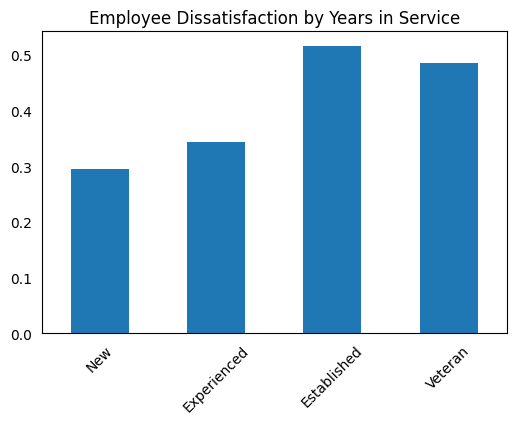

In [44]:
# visualizing the results
plot = pivot_service.plot(kind = 'bar', title = 'Employee Dissatisfaction by Years in Service', legend=False, rot=45)
# removing ticks for cleaner visual
plot.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# removing axis labels
plot.set_xlabel('')  # Remove x-axis label
plot.set_ylabel('')
plt.show()

We can make a tentative conclusion that employees with more than 7 years of work experience are more likely to quit due to some kind of dissatisfaction. 

### Percentage of Dissatisfied Employees Per Age Group

As previously, we will aggregate the `dissatisfied` column and calculate the number of people in each age group to find the percentage and compare.

In [45]:
# grouping by age
pivot_age = combined_updated.pivot_table(index='age_cat', values='dissatisfied')
# setting up the ascending order
desired_order_age = ['21-30', '31-40', '41-50', '51-60', '>61']
# sorting accordigly
pivot_age = pivot_age.reindex(desired_order_age)
pivot_age

,dissatisfied
age_cat,
21-30,0.364341
31-40,0.358209
41-50,0.349345
51-60,0.404762
>61,0.424242


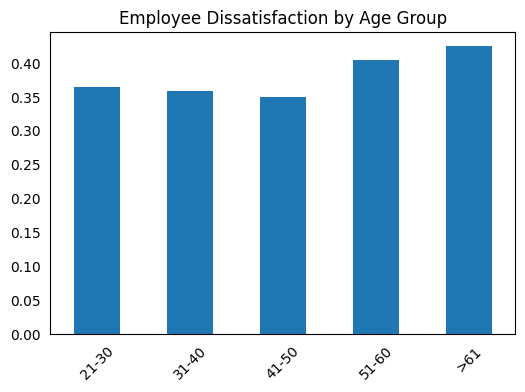

In [46]:
# visualizing the results
plot = pivot_age.plot(kind = 'bar', title = 'Employee Dissatisfaction by Age Group', legend=False, rot=45)
# removing ticks for cleaner visual
plot.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# removing axis labels
plot.set_xlabel('')  # Remove x-axis label
plot.set_ylabel('')
plt.show()

The plot above tells us that the employee dissatisfaction remains similar in all age groups, varying from 35% to 42%. 

However, we can see gradual increase in the height of the bars meaning that, with age employee dissatisfaction increases.

### Percentage of Dissatisfied Employees per Gender
We're going to use the same method to explore the relationship between gender and resignation due to dissatisfaction.

In [47]:
# grouping by gender
pivot_gender = combined_updated.pivot_table(index='gender', values='dissatisfied')
pivot_gender

,dissatisfied
gender,
Female,0.358178
Male,0.398810


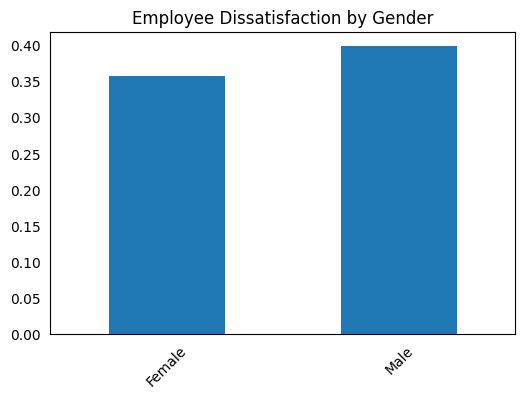

In [48]:
# visualizing the results
plot = pivot_gender.plot(kind = 'bar', title = 'Employee Dissatisfaction by Gender', legend=False, rot=45)
# removing ticks for cleaner visual
plot.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# removing axis labels
plot.set_xlabel('')  # Remove x-axis label
plot.set_ylabel('')
plt.show()

As we can see, there is no significant difference in resignation due to dissatisfaction by gender.

### Percentage of Dissatisfied Employees by Institute
As a final step of our data analysis, we will check the proportion of employees who resigned due to some kind of dissatisfaction depending on the institute: DETE and TAFE.

In [49]:
# grouping by institute
pivot_institute = combined_updated.pivot_table(index='institute', values='dissatisfied')
pivot_institute

,dissatisfied
institute,
DETE,0.479100
TAFE,0.267647


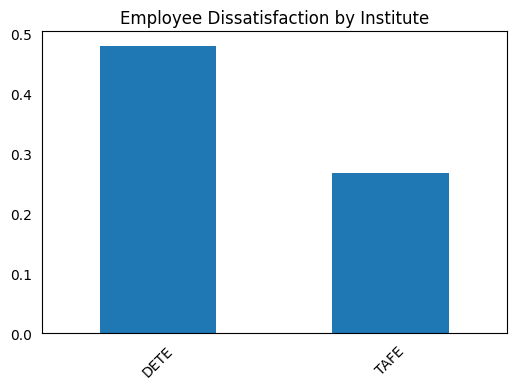

In [50]:
# visualizing the results
plot = pivot_institute.plot(kind = 'bar', title = 'Employee Dissatisfaction by Institute', legend=False, rot=45)
# removing ticks for cleaner visual
plot.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# removing axis labels
plot.set_xlabel('')  # Remove x-axis label
plot.set_ylabel('')
plt.show()

The graph tells us that almost 50% of DETE respondents reported dissatisfaction. It is twice more than what was identified in the TAFE survey. 

## 3: Conclusions

This is the end of the cleaned and analyzed employee exit survey data from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

The following observations were made:

- Over 50% of employees with more than 7 years of experience report job dissatisfaction as a reason for their resignation.
- Employees over 60 years of age were 7% more dissatisfied at the time of leaving compared to younger employees (e.g. 31-40).
- There was only a 4% difference in male (40%) versus female (36%) employees citing dissatisfaction as their primary resignation reason.
- The dissatisfaction is more prevalent in the Department of Education, Training and Employment (DETE) with 49% of people resigning compared to only 28% of TAFE employees.

Based on the above findings, it is recommended that further survey be done on 'experienced' and 'veteran' employees to assess the reasons for employee dissatisfaction and what can be done to improve it.